<a href="https://colab.research.google.com/github/Dhruvjain484/Machine-learning-projects-for-beginner-Part-1/blob/main/Breast_Cancer/Breast_Cancer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore


##Importing the dataset

In [42]:
dataset = pd.read_csv('Breast_cancer.csv')
cl = dataset.columns
dataset = dataset.iloc[:, 1:]

# Checking null values

In [43]:
dataset.info() # checking null values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [44]:
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [45]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


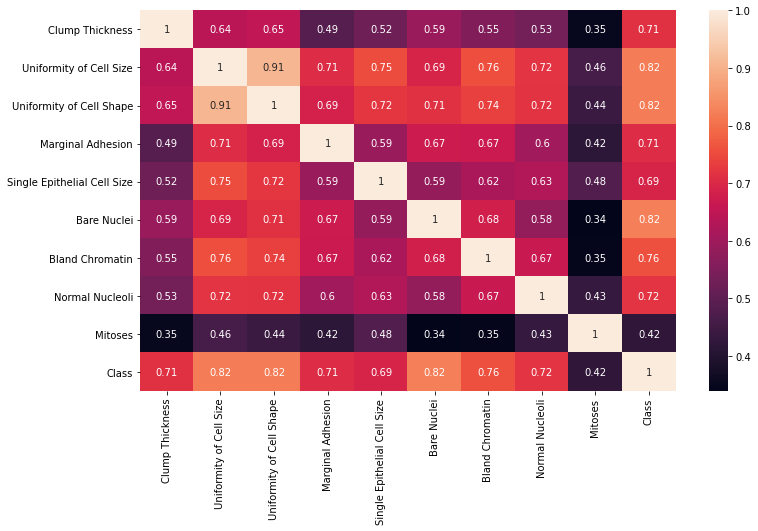

In [46]:
plt.figure(figsize = (12,7))
sns.heatmap(dataset.corr(), annot = True)

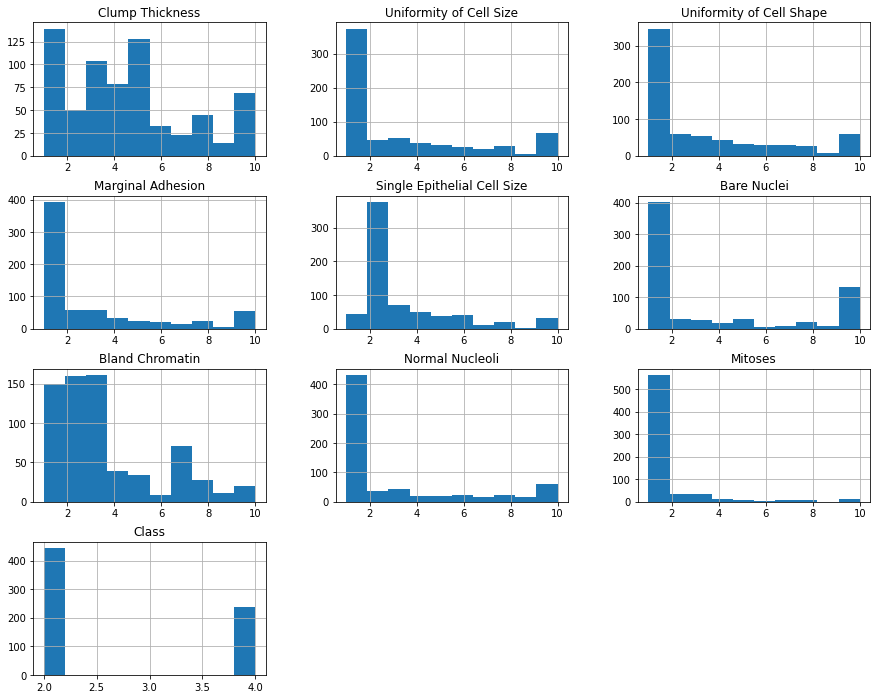

In [47]:
dataset.hist(figsize= (15,12));

#Checking and removing duplicate data

In [48]:
dataset.iloc[[11,30]]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
30,2,1,1,1,2,1,3,1,1,2


In [49]:
non_duplicate_dataset = dataset.copy()
non_duplicate_dataset = non_duplicate_dataset.drop_duplicates() # assumption is made that the rows with identical dataset belongs two one individual 

In [50]:
print('Dataset length with duplicate data: ', len(dataset))
print('Dataset length without duplicate data: ', len(non_duplicate_dataset))

Dataset length with duplicate data:  683
Dataset length without duplicate data:  449


In [51]:
non_duplicate_dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,3.051225
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.999801
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [52]:
non_duplicate_dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


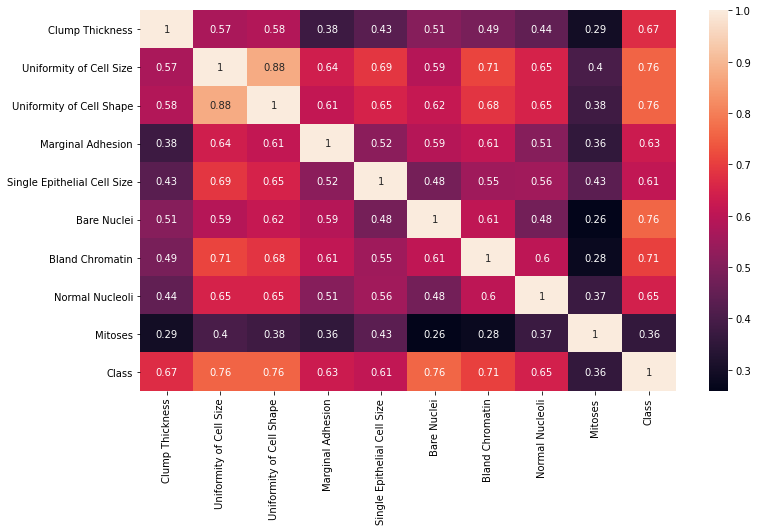

In [53]:
plt.figure(figsize = (12,7))
sns.heatmap(non_duplicate_dataset.corr(), annot = True)

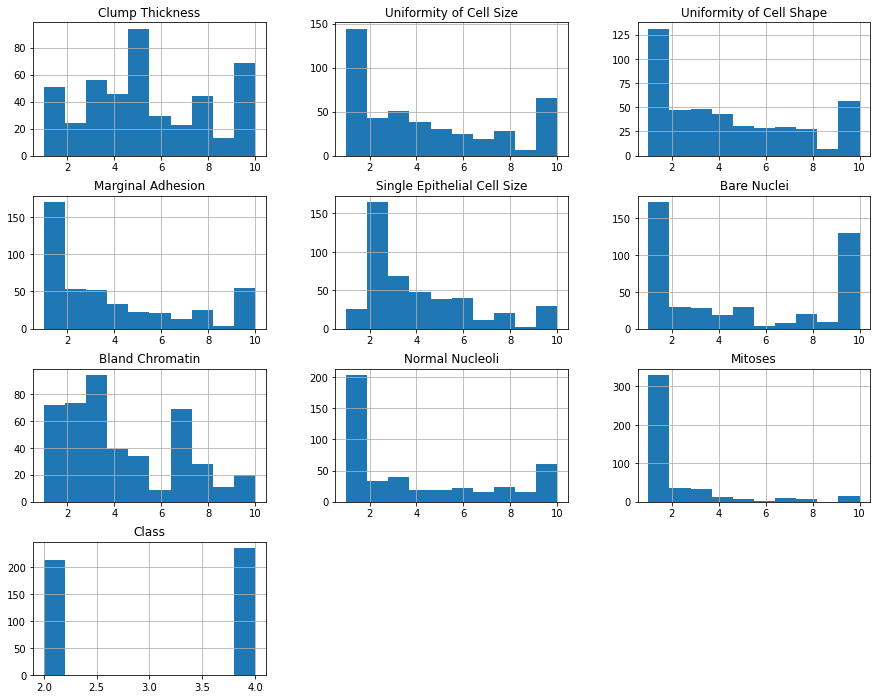

In [54]:
non_duplicate_dataset.hist(figsize= (15,12));

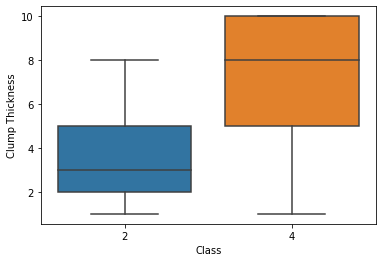

In [55]:
sns.boxplot(data = non_duplicate_dataset, x = 'Class', y = 'Clump Thickness')

In [56]:
# From the graph, it can be concluded that the clump thickness value is higher in malignant case than benign case

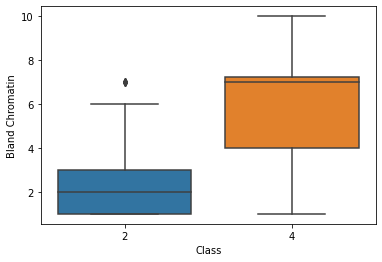

In [57]:
sns.boxplot(data = non_duplicate_dataset, x = 'Class', y = 'Bland Chromatin')

In [58]:
# From the graph, it can be concluded that the Bland Chromatin value is higher in malignant case than benign case

#More Data Preprocessing

In [81]:
dataset_2 = non_duplicate_dataset.copy()  # manually dropping column named 'Uniformity of Cell Size' because of similar values with column 'Uniformity of Cell Shape'
dataset_2 = dataset_2.drop('Uniformity of Cell Size', axis = 1)

#Train test Split

In [82]:
x = dataset_2.iloc[:, :-1].values
y = dataset_2.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.25, random_state =0)

#Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Training on regression models

In [84]:
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()

# from sklearn.xgboost import XGBRegressor
# regressor = XGBRegressor()

regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred), 1)

In [94]:
np.concatenate((y_test.reshape(len(x_test), 1), y_pred), 1)

array([[2.  , 2.02],
       [4.  , 3.06],
       [2.  , 2.  ],
       [2.  , 2.04],
       [2.  , 2.  ],
       [4.  , 4.  ],
       [4.  , 2.92],
       [2.  , 2.  ],
       [2.  , 2.  ],
       [2.  , 2.1 ],
       [2.  , 2.24],
       [4.  , 3.96],
       [4.  , 4.  ],
       [4.  , 4.  ],
       [4.  , 2.4 ],
       [4.  , 3.88],
       [2.  , 2.02],
       [2.  , 3.64],
       [2.  , 2.  ],
       [4.  , 3.38],
       [4.  , 4.  ],
       [2.  , 3.08],
       [4.  , 3.82],
       [4.  , 3.7 ],
       [2.  , 2.  ],
       [4.  , 3.76],
       [4.  , 4.  ],
       [2.  , 3.38],
       [4.  , 4.  ],
       [4.  , 3.92],
       [2.  , 2.3 ],
       [4.  , 3.44],
       [4.  , 4.  ],
       [4.  , 3.34],
       [4.  , 3.9 ],
       [4.  , 3.96],
       [4.  , 3.9 ],
       [4.  , 3.88],
       [4.  , 3.98],
       [4.  , 4.  ],
       [4.  , 3.92],
       [4.  , 4.  ],
       [4.  , 4.  ],
       [4.  , 3.92],
       [4.  , 4.  ],
       [4.  , 3.82],
       [2.  , 2.02],
       [4.  ,

#R2 Score

In [95]:
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test, y_pred)
score

0.788986524822695

In [96]:
mse = mean_squared_error(y_test, y_pred)
mse

0.20504778761061948

#Training on Classification model

In [97]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()


classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
y_pred = classifier.predict(x_test)
np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

array([[2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 2],
       [4, 4],
       [2, 2],
       [2, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2,

#Confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classifier.predict(x_test))
cm

array([[44,  3],
       [ 3, 63]])